In [1]:
#retina
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
trans_x, trans_y = np.array([
[0.7185590851504527, 0.0033145759028049243],
[0.7230877512853341, 0.008388192782690313],
[0.7270111205700381, 0.008983828914309887],
[0.7270111205700381, 0.008983828914309887],
[0.7394850619708679, 0.8129755898394083],
[0.7394850619708679, 0.8129755898394083],
[0.7435471870119249, 0.9151595980151886],
[0.7435471870119249, 0.9151595980151886],
[0.7478506264118565, 0.971951599454333],
[0.7478506264118565, 0.971951599454333],
[0.7510822278677866, 0.8660434986932993],
[0.7510822278677866, 0.8660434986932993],
[0.7654464650798013, 0.008002327793920334],
[0.7602763049409115, 0.028501079455818236],
[0.7547642827936158, 0.39003078071034625],
[0.7531273670592493, 0.6171588948169336],
[0.7531273670592493, 0.6171588948169336],
[0.7693597795995522, 0.002079746244341843],
[0.7364927639208221, 0.5728325644090719],
[0.7735204413371496, 0.003939616322030507],
[0.7829638765811118, 0.0009441468348216352],
[0.789244082770825, 0.004551920072116221],
[0.7127735733964325, 0.011897489497876926],
[0.7067648458604532, 0.0011628946480895935],
[0.714649792536683, 0.00033492987430014127],
[0.8085291219508925, 0.004064934837671339],
[0.791480262496397, 0.0001987702134573844],
[0.7972436537675204, 0.00041973297107220173],
[0.7856605645415362, 0.0026655765514741704],
[0.7933866459315069, 0.003104447715033533],
[0.7055663178780424, 0.004517517718510837],
[0.8120261692015847, 0.0018134029205370398],
[0.8173551946267336, 0.006784536626789165],
[0.8148917772132214, 0.0038497225983278077],
[0.820546577022851, 0.0036406118025730646],
[0.824928443589417, 0.004433181713542051],
[0.8276713834686258, 0.00013638050721253545],
[0.8310437516338993, 0.0018546242004586746],
[0.8337464724532956, 0.004090770031502002]    ,]).T

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0, 0.5, 'Transmission')

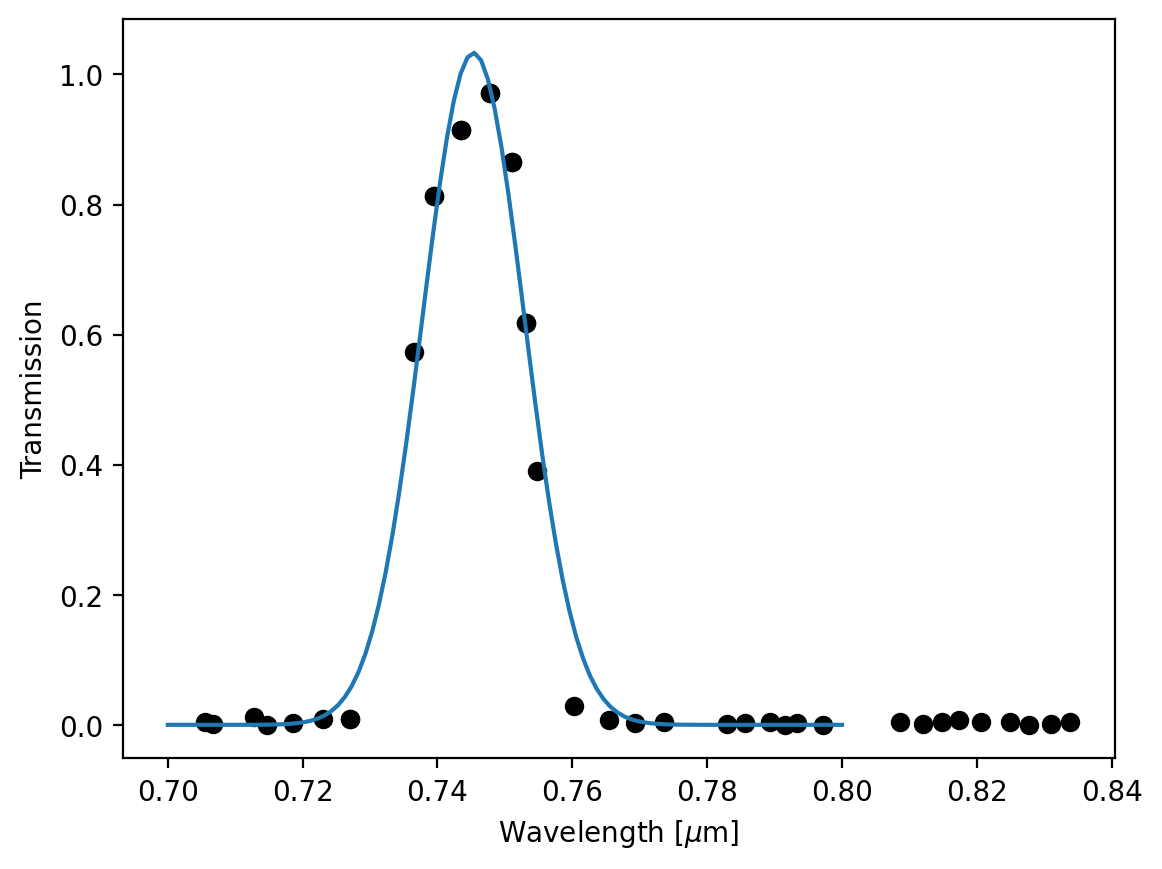

In [5]:
from astropy.modeling.models import Gaussian1D

isort = np.argsort(trans_x)
trans_x, trans_y = trans_x[isort], trans_y[isort]

# gaussian fit
g_init = Gaussian1D(amplitude=1., mean=0.74, stddev=0.05)
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter()
g = fitter(g_init, trans_x, trans_y)

x = np.linspace(0.7, 0.8, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(trans_x, trans_y, 'ok')
ax.plot(x, g(x), label='Gaussian fit')
# ax.set_yscale('log')
# ax.set_ylim(1e-4, 1.5)
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('Transmission')


### LVF with a fixed resolving power ($R$)

$\lambda_1 +\frac{\Delta \lambda_1}{2} = \lambda_2 -\frac{\Delta \lambda_2}{2}$

$\lambda_2 = \lambda_1 \left(\frac{2R+1}{2R-1}\right)$

In [6]:
band1_start = 0.75

span_band1 = 1.119 - 0.737
span_band2 = 1.655 - 1.088
span_band3 = 1.620 - 2.415

band2_start = 1.088 + (band1_start-0.737) * span_band2 / span_band1
print(band2_start)

band3_start = 1.620 + (band1_start-0.737) * span_band3 / span_band1
print(band3_start)

1.1072958115183247
1.5929450261780105


lambda center: 1.108, 1.107, 1.636, 1.593, 2.353, 2.420, 3.823, 3.820, 4.418, 4.420, 4.999


Text(0, 0.5, 'Transmission')

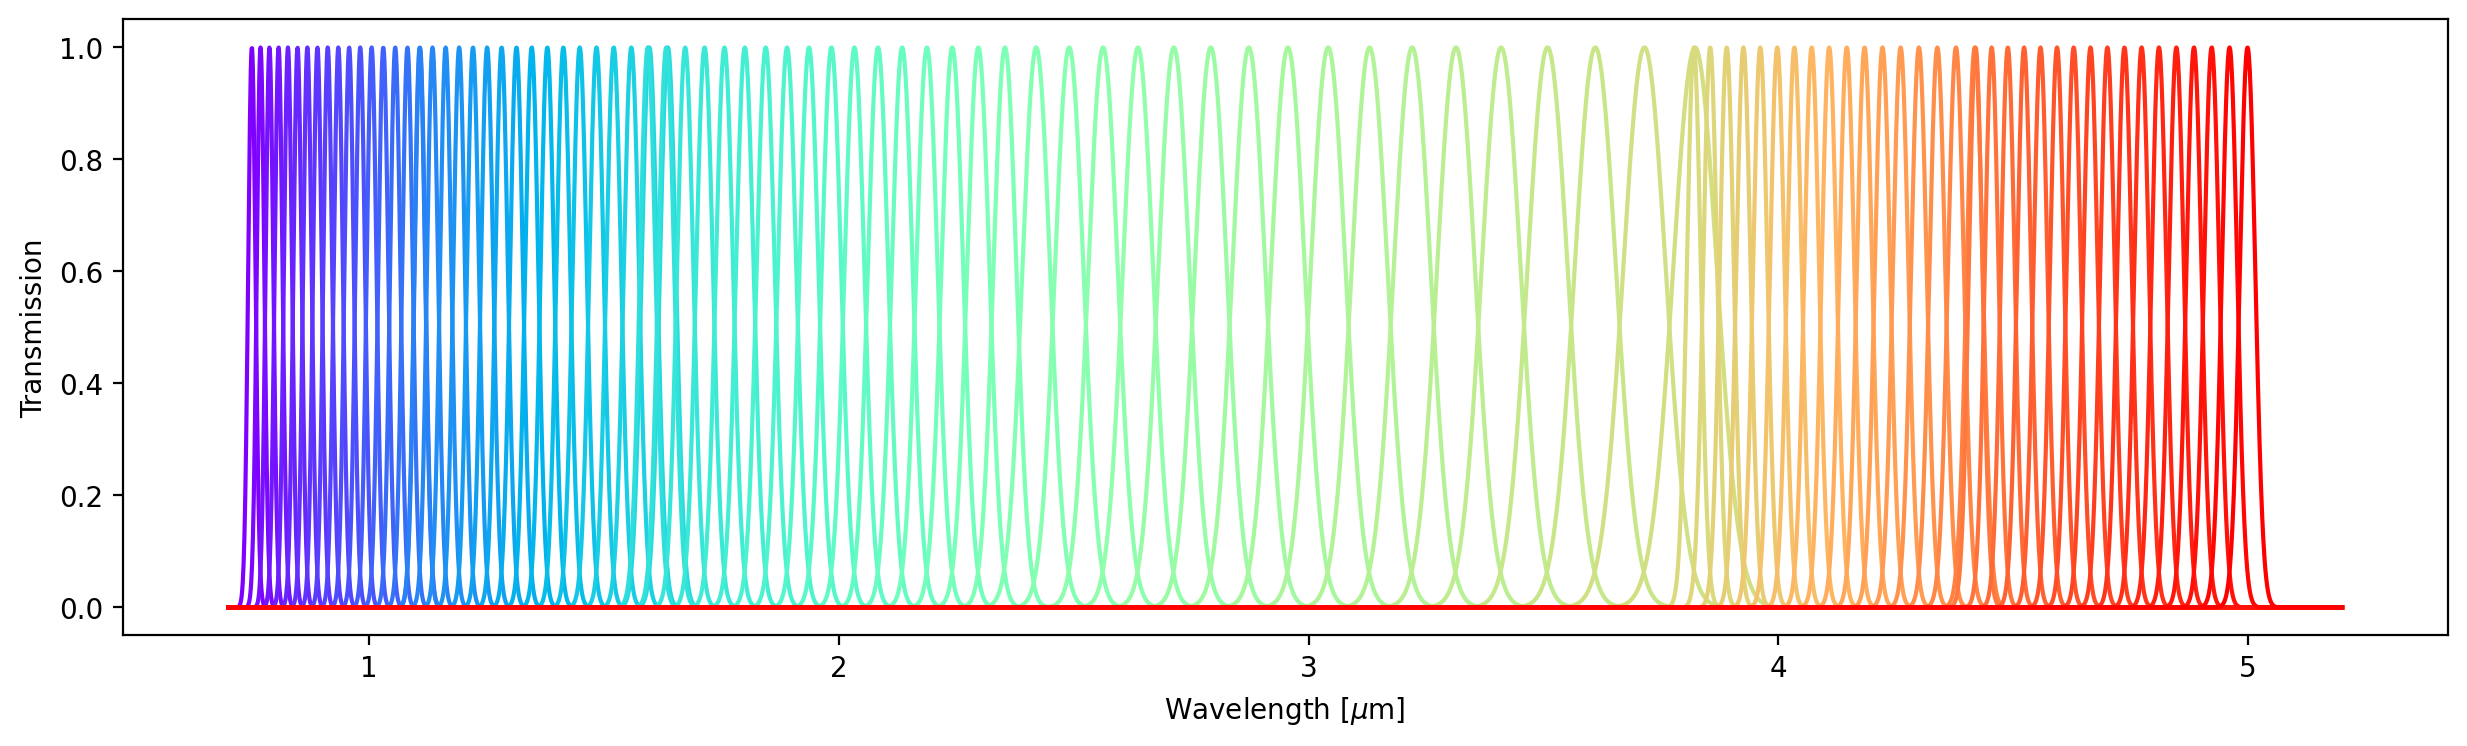

In [7]:
Nchan_total = 102
colors = plt.cm.rainbow(np.linspace(0, 1, Nchan_total))

def get_trans_band(band_start, Nchan, R):
    ichan = np.arange(Nchan)
    lcen  = band_start * ( (2*R+1)/(2*R-1) )**ichan  # Why?
    width = lcen / R
    return lcen, width

lmin1 = band1_start  # minimum wavelength [um]
Nchan1 = 17    # Number of independent resolution elements with the LVF
R1 = 41       # Resolving power at each LVF point

lcen1, width1 = get_trans_band(lmin1, Nchan1, R1)

lmin2, Nchan2, R2 = band2_start, 17, 41
lcen2, width2 = get_trans_band(lmin2, Nchan2, R2)

lmin3, Nchan3, R3 = band3_start, 17, 41
lcen3, width3 = get_trans_band(lmin3, Nchan3, R3)

lmin4, Nchan4, R4 = 2.42, 17, 35
lcen4, width4 = get_trans_band(lmin4, Nchan4, R4)

lmin5, Nchan5, R5 = 3.82, 17, 110
lcen5, width5 = get_trans_band(lmin5, Nchan5, R5)

lmin6, Nchan6, R6 = 4.42, 17, 130
lcen6, width6 = get_trans_band(lmin6, Nchan6, R6)

print(f'lambda center: {lcen1[-1]:.3f}, {lcen2[0]:.3f}, {lcen2[-1]:.3f}, {lcen3[0]:.3f}, {lcen3[-1]:.3f}, {lcen4[0]:.3f}, {lcen4[-1]:.3f}, {lcen5[0]:.3f}, {lcen5[-1]:.3f}, {lcen6[0]:.3f}, {lcen6[-1]:.3f}')

lcen = np.concatenate([lcen1, lcen2, lcen3, lcen4, lcen5, lcen6])
width = np.concatenate([width1, width2, width3, width4, width5, width6])

wvec = np.linspace(0.7, 5.2, 5001)
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
for i, l, w in zip(np.arange(Nchan_total), lcen, width):
    prof = Gaussian1D(amplitude=1, mean=l, stddev=w/2.35)
    ax.plot(wvec, prof(wvec), c=colors[i])
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('Transmission')

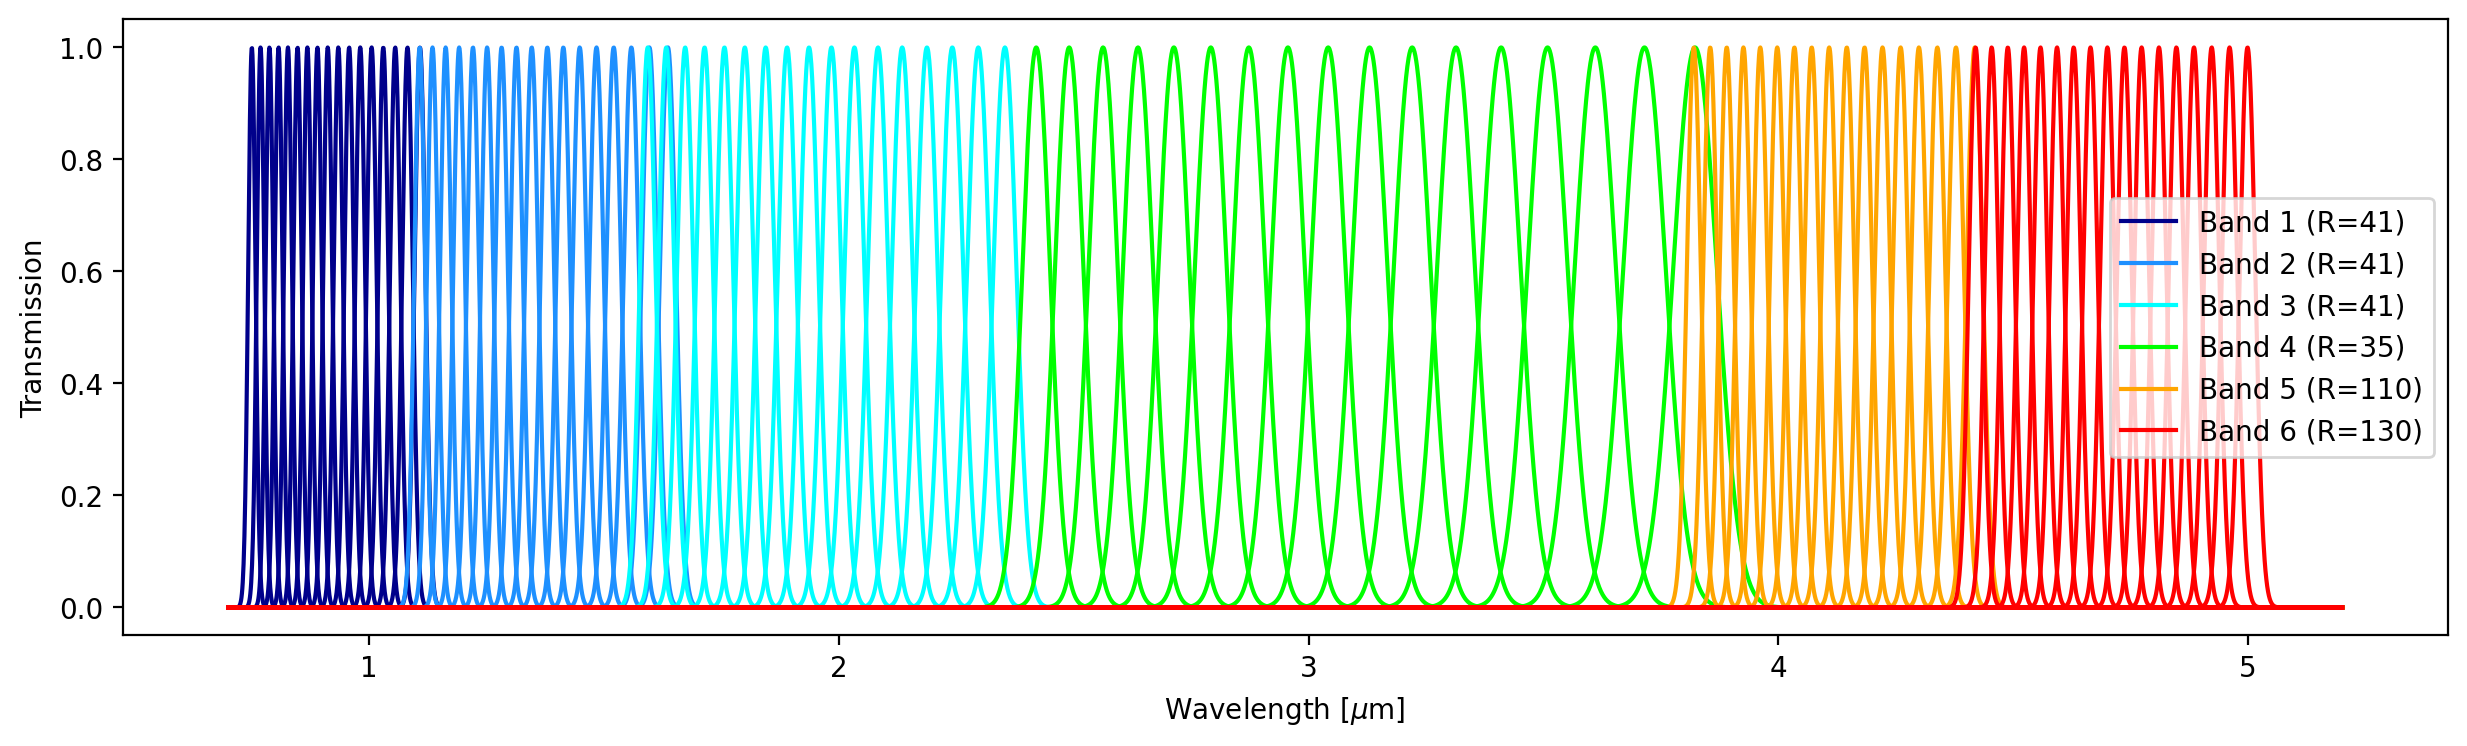

In [8]:
from pathlib import Path
from eazy import filters, utils

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)

llcen = [lcen1, lcen2, lcen3, lcen4, lcen5, lcen6]
lwidth = [width1, width2, width3, width4, width5, width6]
lNchan = [Nchan1, Nchan2, Nchan3, Nchan4, Nchan5, Nchan6]
lR = [R1, R2, R3, R4, R5, R6]
lcolor = ['darkblue', 'dodgerblue', 'cyan', 'lime', 'orange', 'red']
if Path('test_lvf.res').exists():
    Path('test_lvf.res').unlink()
if Path('test_lvf.res.info').exists():
    Path('test_lvf.res.info').unlink()
with open('test_lvf.res', 'a') as f1:
    with open('test_lvf.res.info', 'a') as f2:
        for j in range(6):
            _ichan = np.arange(lNchan[j])
            _lcen = llcen[j]
            _width = lwidth[j]
            _R = lR[j]
            _color = lcolor[j]
            for i, l, w in zip(_ichan, _lcen, _width):
                prof = Gaussian1D(amplitude=1, mean=l, stddev=w/2.35)
                tran = prof(wvec)
                if i == 0:
                    ax.plot(wvec, tran, c=_color, label=f'Band {j+1} (R={_R})')
                else:
                    ax.plot(wvec, tran, c=_color)
                wmask = tran > 1e-8
                res = filters.FilterDefinition(wave=wvec[wmask]*1e4,
                                            throughput=tran[wmask],
                                            name=f'Band{j+1}_{i+1}')
                filter_str = res.for_filter_file()
                filter_name = filter_str.split('\n')[0]
                f1.write(filter_str+ '\n')
                f2.write(filter_name + '\n')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('Transmission')
ax.legend()
        

In [43]:
import os
from eazy import filters, utils

latest_filters = filters.FilterFile(os.path.join(utils.path_to_eazy_data(), 'FILTER.RES.latest'))
i_u = latest_filters.search('Johnson_U')
i_b = latest_filters.search('Johnson_B')
i_v = latest_filters.search('Johnson_V')
i_j = latest_filters.search('2MASS/J')
i_k = latest_filters.search('2MASS/K')
i_ubvjk = list(np.concatenate([i_u, i_b, i_v, i_j, i_k]))

DEFAULT_RF_FILTERS = [270, 274] # UV tophat
DEFAULT_RF_FILTERS += [120, 121] # GALEX
DEFAULT_RF_FILTERS += [156, 157, 158, 159, 160] #SDSS
DEFAULT_RF_FILTERS += [161, 162, 163] # 2MASS
NUVRK_FILTERS = [121, 158, 163]
absmag_filters=[271, 272, 274]
additional_filters = np.unique(DEFAULT_RF_FILTERS + NUVRK_FILTERS + absmag_filters) - 1
append_filters = np.setdiff1d(additional_filters, i_ubvjk)

with open('ubvjk.res', 'w') as f:
    for i in i_ubvjk:
        f.write(latest_filters.filters[i].for_filter_file() + '\n')
    for i in append_filters:
        f.write(latest_filters.filters[i].for_filter_file() + '\n')

  153 REST_FRAME/maiz-apellaniz_Johnson_U.res 2006AJ....131.1184M lambda_c= 3.5900e+03 AB-Vega= 0.769 w95=862.3
  154 REST_FRAME/maiz-apellaniz_Johnson_B.res 2006AJ....131.1184M lambda_c= 4.3722e+03 AB-Vega=-0.106 w95=1321.3
  155 REST_FRAME/maiz-apellaniz_Johnson_V.res 2006AJ....131.1184M lambda_c= 5.4794e+03 AB-Vega= 0.002 w95=1369.1
  161 2MASS/J.res lambda_c= 1.2358e+04 AB-Vega= 0.885 w95=2311.1
  163 2MASS/K.res lambda_c= 2.1603e+04 AB-Vega= 1.830 w95=3020.3


In [44]:
i_ubvjk

[152, 153, 154, 160, 162]

In [45]:
append_filters

array([119, 120, 155, 156, 157, 158, 159, 161, 269, 270, 271, 273])

In [46]:
lvf_res = filters.FilterFile('test_lvf.res')
ubvjk_res = filters.FilterFile('ubvjk.res')
for filter in ubvjk_res.filters:
    lvf_res.filters.append(filter)
lvf_res.write('test_lvf_ubvjk.res')

Wrote <test_lvf_ubvjk.res[.info]>


In [94]:
# with open('test_lvf_ubvjk.res.info', 'w') as f:
#     for i, filter in enumerate(lvf_res.filters):
#         info_str = f'{i+1:3d} {filter.name}\n'
#         f.write(info_str)
#         print(info_str, end='')

  1 Band1_1 lambda_c= 7.4996e+03 AB-Vega= 0.368 w95=305.2
  2 Band1_2 lambda_c= 7.6848e+03 AB-Vega= 0.398 w95=312.8
  3 Band1_3 lambda_c= 7.8745e+03 AB-Vega= 0.429 w95=320.5
  4 Band1_4 lambda_c= 8.0690e+03 AB-Vega= 0.458 w95=328.5
  5 Band1_5 lambda_c= 8.2682e+03 AB-Vega= 0.488 w95=336.5
  6 Band1_6 lambda_c= 8.4723e+03 AB-Vega= 0.529 w95=344.8
  7 Band1_7 lambda_c= 8.6815e+03 AB-Vega= 0.541 w95=353.2
  8 Band1_8 lambda_c= 8.8959e+03 AB-Vega= 0.506 w95=362.1
  9 Band1_9 lambda_c= 9.1155e+03 AB-Vega= 0.497 w95=371.0
 10 Band1_10 lambda_c= 9.3406e+03 AB-Vega= 0.500 w95=380.2
 11 Band1_11 lambda_c= 9.5712e+03 AB-Vega= 0.552 w95=389.4
 12 Band1_12 lambda_c= 9.8076e+03 AB-Vega= 0.535 w95=399.2
 13 Band1_13 lambda_c= 1.0050e+04 AB-Vega= 0.624 w95=409.0
 14 Band1_14 lambda_c= 1.0298e+04 AB-Vega= 0.607 w95=419.1
 15 Band1_15 lambda_c= 1.0552e+04 AB-Vega= 0.642 w95=429.5
 16 Band1_16 lambda_c= 1.0813e+04 AB-Vega= 0.711 w95=440.0
 17 Band1_17 lambda_c= 1.1080e+04 AB-Vega= 0.747 w95=450.7
 18 Ba

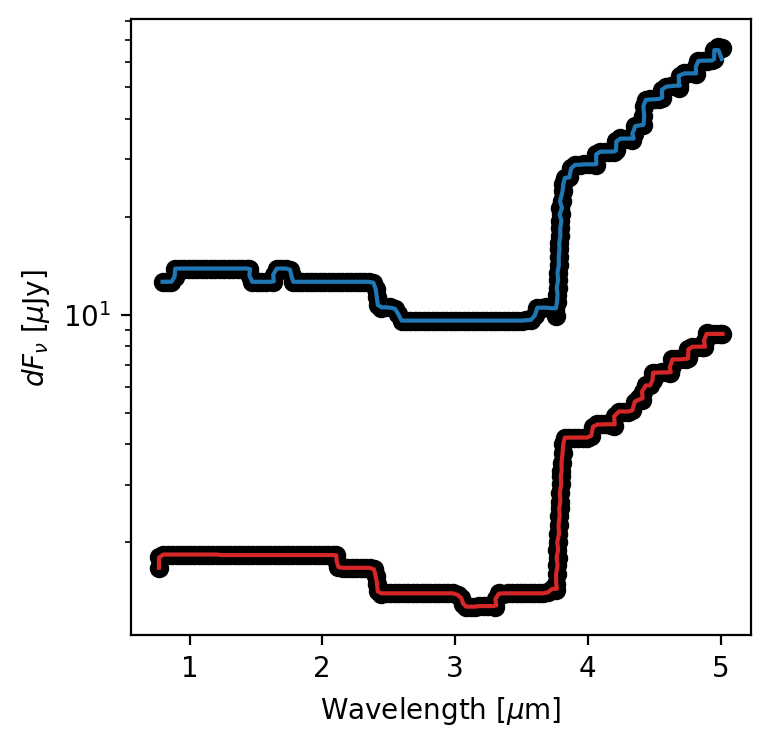

In [8]:
from astropy.table import Table
from scipy.signal import savgol_filter, medfilt

mev_fullsky = Table.read('../fullsky.csv', names=['wave', 'dfnu'])
mev_deep = Table.read('../deep.csv', names=['wave', 'dfnu'])

mev_fullsky['dfnu_smooth'] = savgol_filter(mev_fullsky['dfnu'], 5, 3)
mev_deep['dfnu_smooth'] = savgol_filter(mev_deep['dfnu'], 5, 3)

mev_fullsky['dfnu_med'] = medfilt(mev_fullsky['dfnu'], 5)
mev_deep['dfnu_med'] = medfilt(mev_deep['dfnu'], 5)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(mev_fullsky['wave'], mev_fullsky['dfnu'], 'ok', label='Full-sky')
ax.plot(mev_deep['wave'], mev_deep['dfnu'], 'ok', label='Deep')
# ax.plot(mev_fullsky['wave'], mev_fullsky['dfnu_smooth'], c='tab:blue')
# ax.plot(mev_deep['wave'], mev_deep['dfnu_smooth'], c='tab:red')
ax.plot(mev_fullsky['wave'], mev_fullsky['dfnu_med'], c='tab:blue')
ax.plot(mev_deep['wave'], mev_deep['dfnu_med'], c='tab:red')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'$dF_\nu$ [$\mu$Jy]')
ax.set_yscale('log')

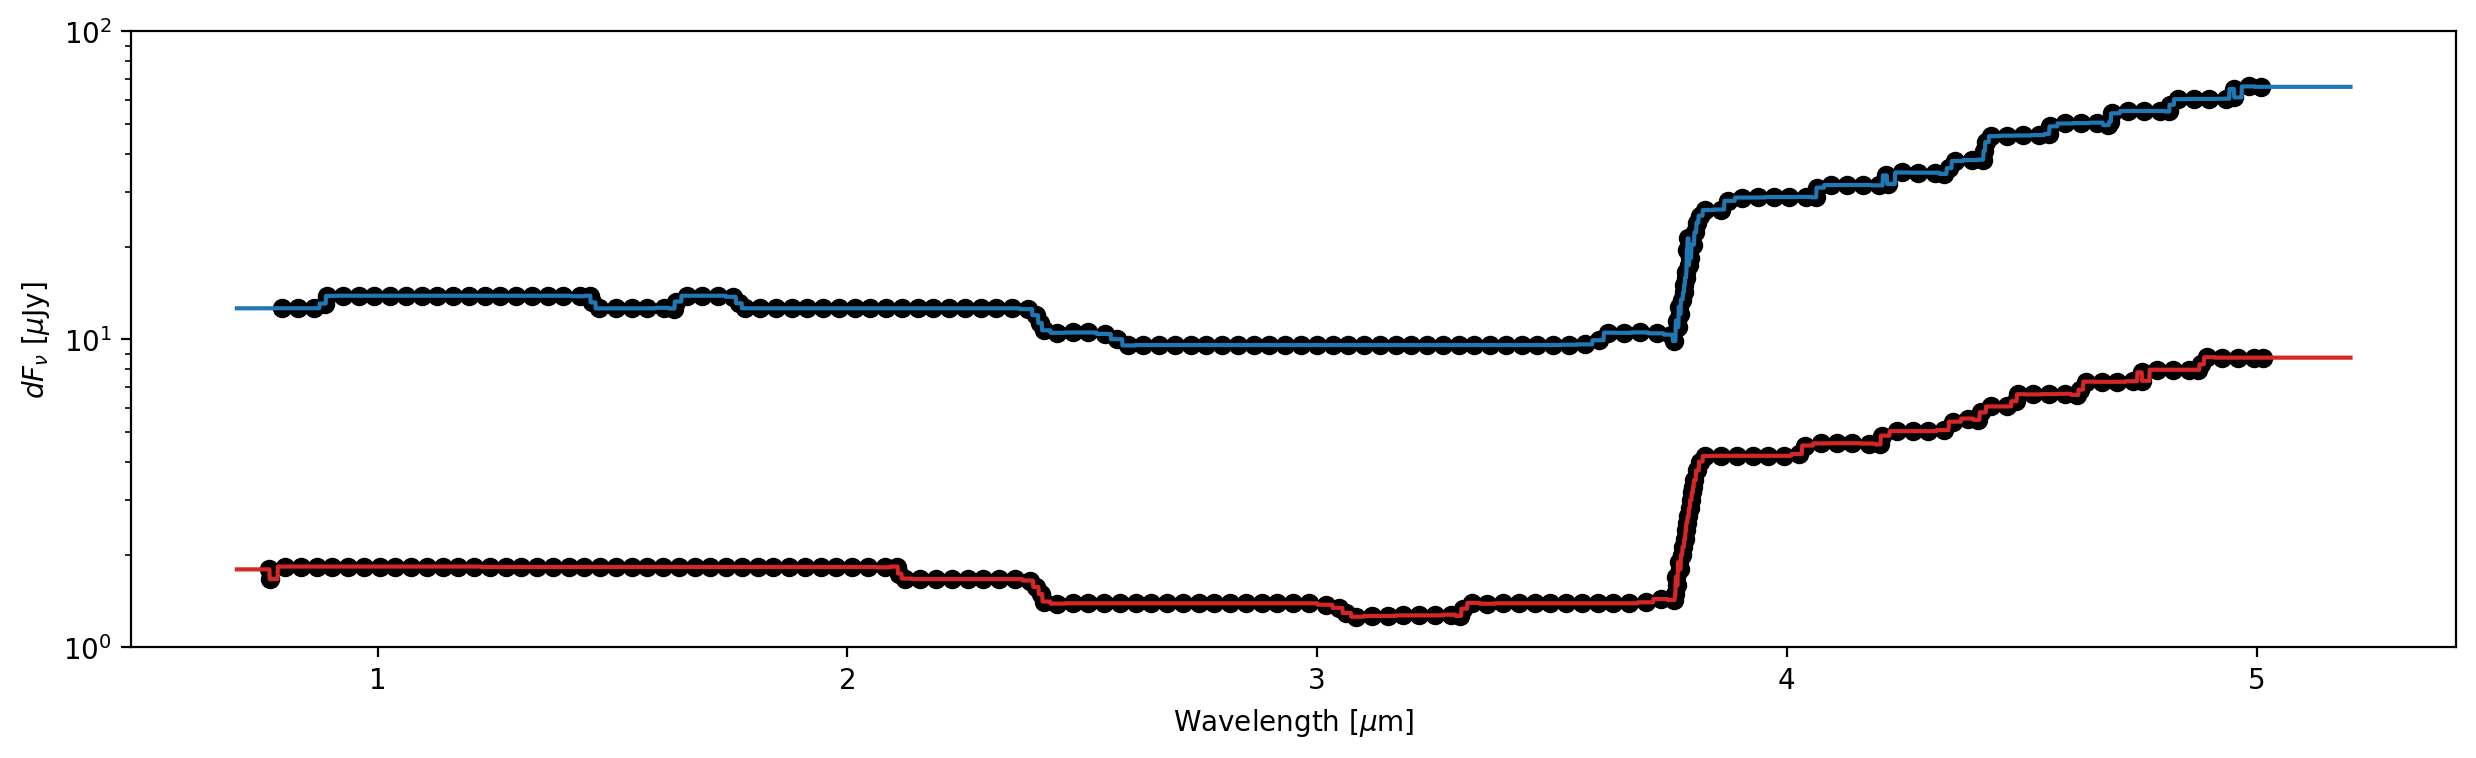

In [9]:
from scipy.interpolate import interp1d
mev_fs_interp = interp1d(mev_fullsky['wave'], mev_fullsky['dfnu'], kind='nearest', fill_value='extrapolate')
mev_deep_interp = interp1d(mev_deep['wave'], mev_deep['dfnu'], kind='nearest', fill_value='extrapolate')

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.plot(mev_fullsky['wave'], mev_fullsky['dfnu'], 'ok', label='Full-sky')
ax.plot(mev_deep['wave'], mev_deep['dfnu'], 'ok', label='Deep')
ax.plot(wvec, mev_fs_interp(wvec), c='tab:blue', label='Full-sky')
ax.plot(wvec, mev_deep_interp(wvec), c='tab:red', label='Deep')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'$dF_\nu$ [$\mu$Jy]')
ax.set_ylim(1, 1e2)
ax.set_yscale('log')


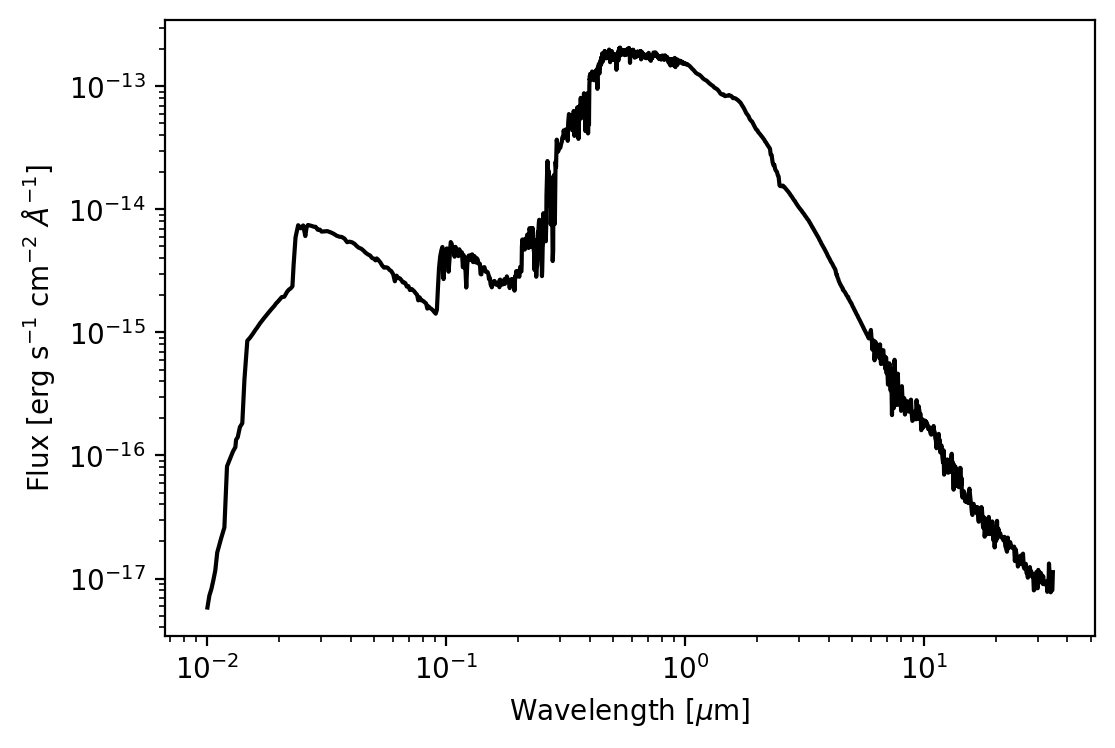

In [10]:
spec_example = Table.read('../NGC_0584_spec.dat', format='ascii', names=['wave', 'flux', 'wave_o', 'source'])

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(spec_example['wave']*1e-4, spec_example['flux'], 'k')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'Flux [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')

In [11]:
def calculate_synthetic_flam(lam, flam, filter_lam, filter_trans):
    """Calculate the synthetic magnitude of a spectrum through a given filter."""
    # Interpolate spectrum and filter transmission to a common wavelength grid
    common_lam = np.linspace(max(min(lam), min(filter_lam)), 
                                     min(max(lam), max(filter_lam)), num=1000)
    flam_interp = np.interp(common_lam, lam, flam)
    trans_interp = np.interp(common_lam, filter_lam, filter_trans)

    # Calculate the flux received through the filter
    synthetic_flam = (np.trapz(flam_interp * trans_interp * common_lam, common_lam) / 
                      np.trapz(trans_interp * common_lam, common_lam))
    
    # Pivot wavelength
    pivot_lam = np.sqrt(np.trapz(common_lam * trans_interp, common_lam) /
                        np.trapz(trans_interp / common_lam, common_lam))
    
    return synthetic_flam, pivot_lam

In [57]:
names = []
eznames = []
i = 0
for band in range(1,7):
    for chan in range(1, 18):
        i += 1
        names.append(f'F{band}C{chan:02d}')
        names.append(f'E{band}C{chan:02d}')
        eznames.append(f'F{i}')
        eznames.append(f'E{i}')

print(names)
print(eznames)

translate = Table([names, eznames], names=['name', 'ezname'])
# no header
translate.write('test.translate', format='ascii.no_header', overwrite=True)

['F1C01', 'E1C01', 'F1C02', 'E1C02', 'F1C03', 'E1C03', 'F1C04', 'E1C04', 'F1C05', 'E1C05', 'F1C06', 'E1C06', 'F1C07', 'E1C07', 'F1C08', 'E1C08', 'F1C09', 'E1C09', 'F1C10', 'E1C10', 'F1C11', 'E1C11', 'F1C12', 'E1C12', 'F1C13', 'E1C13', 'F1C14', 'E1C14', 'F1C15', 'E1C15', 'F1C16', 'E1C16', 'F1C17', 'E1C17', 'F2C01', 'E2C01', 'F2C02', 'E2C02', 'F2C03', 'E2C03', 'F2C04', 'E2C04', 'F2C05', 'E2C05', 'F2C06', 'E2C06', 'F2C07', 'E2C07', 'F2C08', 'E2C08', 'F2C09', 'E2C09', 'F2C10', 'E2C10', 'F2C11', 'E2C11', 'F2C12', 'E2C12', 'F2C13', 'E2C13', 'F2C14', 'E2C14', 'F2C15', 'E2C15', 'F2C16', 'E2C16', 'F2C17', 'E2C17', 'F3C01', 'E3C01', 'F3C02', 'E3C02', 'F3C03', 'E3C03', 'F3C04', 'E3C04', 'F3C05', 'E3C05', 'F3C06', 'E3C06', 'F3C07', 'E3C07', 'F3C08', 'E3C08', 'F3C09', 'E3C09', 'F3C10', 'E3C10', 'F3C11', 'E3C11', 'F3C12', 'E3C12', 'F3C13', 'E3C13', 'F3C14', 'E3C14', 'F3C15', 'E3C15', 'F3C16', 'E3C16', 'F3C17', 'E3C17', 'F4C01', 'E4C01', 'F4C02', 'E4C02', 'F4C03', 'E4C03', 'F4C04', 'E4C04', 'F4C05', 

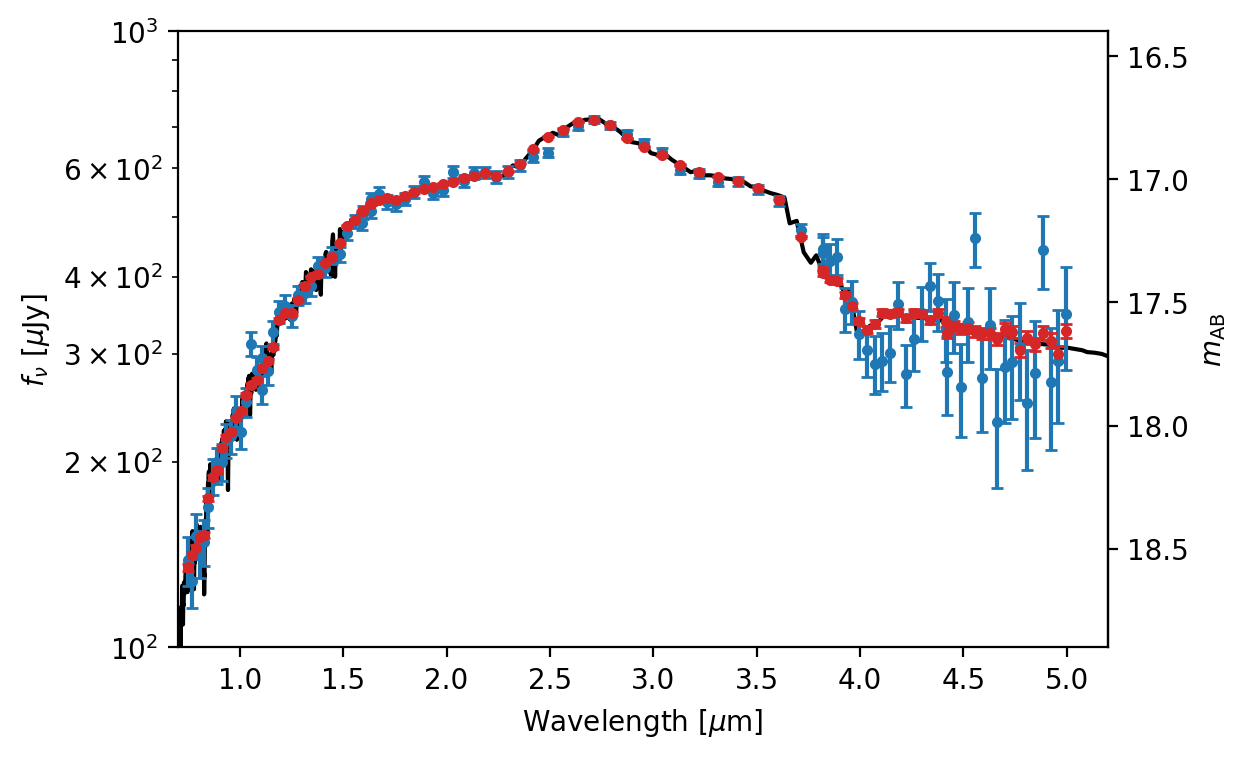

In [99]:
def flam_to_fnu(lam, flam):
    fnu = 3.34e4*lam**2*flam # in Jy
    return fnu * 1e6 # in uJy

def fnu_to_flam(lam, fnu):
    flam = fnu / (3.34e4*lam**2) # fnu in uJy
    return flam * 1e-6 # in erg/s/cm^2/A

scaling_factor = 1e-3
fiducial_redshift = 0.6

lam = spec_example['wave'] * (1+fiducial_redshift)
flam = spec_example['flux'] * scaling_factor / (1+fiducial_redshift)**2
fnu = flam_to_fnu(lam, flam) # in uJy

pivlam = np.zeros(Nchan_total)
syn_fnu_fs = np.zeros(Nchan_total)
syn_fnu_dp = np.zeros(Nchan_total)
syn_fnu = np.zeros(Nchan_total)
syn_fnu_error_fs = np.zeros(Nchan_total)
syn_fnu_error_dp = np.zeros(Nchan_total)
for i, l, w in zip(np.arange(Nchan_total), lcen, width):
    prof = Gaussian1D(amplitude=1, mean=l*1e4, stddev=w/2.35*1e4)
    trans = prof(wvec*1e4)
    syn_flam, pivot_lam = calculate_synthetic_flam(lam, flam, wvec*1e4, trans)
    syn_fnu_anchor = flam_to_fnu(pivot_lam, syn_flam) # in uJy
    
    error_fs = mev_fs_interp(pivot_lam*1e-4)
    # syn_fnu_error_fs[i] = np.sqrt(error_fs**2 + syn_fnu_anchor)
    syn_fnu_error_fs[i] = np.sqrt(error_fs**2)
    error_dp = mev_deep_interp(pivot_lam*1e-4)
    # syn_fnu_error_dp[i] = np.sqrt(error_dp**2 + syn_fnu_anchor)
    syn_fnu_error_dp[i] = np.sqrt(error_dp**2)
    
    # update the synthetic flux
    # np.random.seed(101)
    syn_fnu_fs[i] = np.random.normal(syn_fnu_anchor, syn_fnu_error_fs[i])
    syn_fnu_dp[i] = np.random.normal(syn_fnu_anchor, syn_fnu_error_dp[i])
    pivlam[i] = pivot_lam
    syn_fnu[i] = syn_fnu_anchor
    
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(lam*1e-4, fnu, 'k')
ax.errorbar(pivlam*1e-4, syn_fnu_fs, yerr=syn_fnu_error_fs, fmt='o', c='tab:blue', label='Full-sky', ms=3, capsize=2)
ax.errorbar(pivlam*1e-4, syn_fnu_dp, yerr=syn_fnu_error_dp, fmt='o', c='tab:red', label='Deep', ms=3, capsize=2)
# ax.plot(pivlam*1e-4, syn_fnu, 'o', c='k', alpha=0.1)
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'$f_\nu$ [$\mu$Jy]')
ax.set_xlim(0.7, 5.2)


ax.set_yscale('log')
ax.set_ylim(1e2, 1e3)
secax = ax.secondary_yaxis('right', functions=(lambda x: -2.5*np.log10(x*1e-6/3631), lambda x: 3631*1e6*10**(-0.4*x)))
# tick format
secax.set_ylabel(r'$m_{\rm AB}$')
secax.set_ticks([18.5, 18, 17.5, 17, 16.5])
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter
secax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

arr_fs = np.ravel(np.vstack([syn_fnu_fs, syn_fnu_error_fs]).T)
tab_fs = Table(arr_fs.T, names=names)
tab_fs['id'] = [0]
tab_fs.write('test_synphot_bright_fullsky.dat', format='ascii.commented_header', overwrite=True)

arr_dp = np.ravel(np.vstack([syn_fnu_dp, syn_fnu_error_dp]).T)
tab_dp = Table(arr_dp.T, names=names)
tab_dp['id'] = [0]
tab_dp.write('test_synphot_bright_deep.dat', format='ascii.commented_header', overwrite=True)

In [100]:
from astropy.table import vstack
tab_all = vstack([tab_fs, tab_dp])

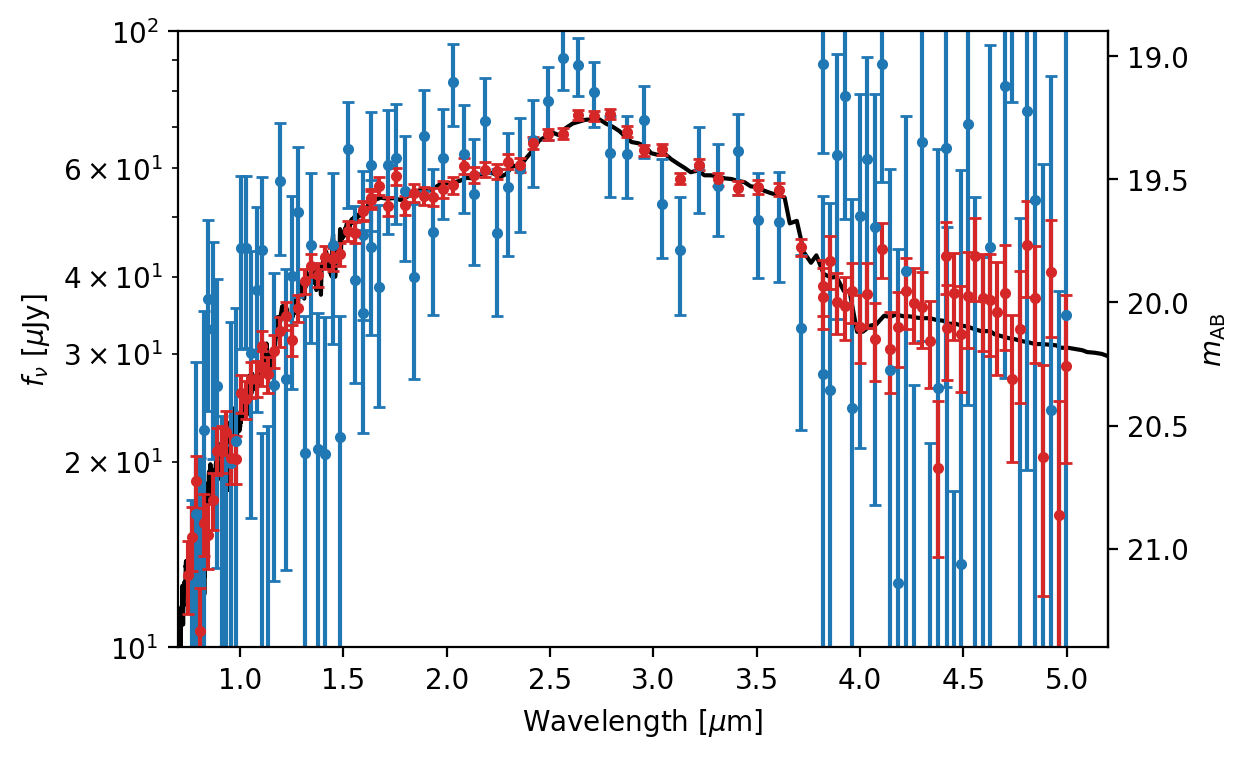

In [101]:
def flam_to_fnu(lam, flam):
    fnu = 3.34e4*lam**2*flam # in Jy
    return fnu * 1e6 # in uJy

def fnu_to_flam(lam, fnu):
    flam = fnu / (3.34e4*lam**2) # fnu in uJy
    return flam * 1e-6 # in erg/s/cm^2/A

scaling_factor = 1e-4
fiducial_redshift = 0.6

lam = spec_example['wave']*(1+fiducial_redshift)
flam = spec_example['flux'] * scaling_factor / (1+fiducial_redshift)**2
fnu = flam_to_fnu(lam, flam) # in uJy

pivlam = np.zeros(Nchan_total)
syn_fnu_fs = np.zeros(Nchan_total)
syn_fnu_dp = np.zeros(Nchan_total)
syn_fnu = np.zeros(Nchan_total)
syn_fnu_error_fs = np.zeros(Nchan_total)
syn_fnu_error_dp = np.zeros(Nchan_total)
for i, l, w in zip(np.arange(Nchan_total), lcen, width):
    prof = Gaussian1D(amplitude=1, mean=l*1e4, stddev=w/2.35*1e4)
    trans = prof(wvec*1e4)
    syn_flam, pivot_lam = calculate_synthetic_flam(lam, flam, wvec*1e4, trans)
    syn_fnu_anchor = flam_to_fnu(pivot_lam, syn_flam) # in uJy
    
    error_fs = mev_fs_interp(pivot_lam*1e-4)
    # syn_fnu_error_fs[i] = np.sqrt(error_fs**2 + syn_fnu_anchor)
    syn_fnu_error_fs[i] = np.sqrt(error_fs**2)
    error_dp = mev_deep_interp(pivot_lam*1e-4)
    # syn_fnu_error_dp[i] = np.sqrt(error_dp**2 + syn_fnu_anchor)
    syn_fnu_error_dp[i] = np.sqrt(error_dp**2)
    
    # update the synthetic flux
    # np.random.seed(101)
    syn_fnu_fs[i] = np.random.normal(syn_fnu_anchor, syn_fnu_error_fs[i])
    syn_fnu_dp[i] = np.random.normal(syn_fnu_anchor, syn_fnu_error_dp[i])
    pivlam[i] = pivot_lam
    syn_fnu[i] = syn_fnu_anchor
    
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(lam*1e-4, fnu, 'k')
ax.errorbar(pivlam*1e-4, syn_fnu_fs, yerr=syn_fnu_error_fs, fmt='o', c='tab:blue', label='Full-sky', ms=3, capsize=2)
ax.errorbar(pivlam*1e-4, syn_fnu_dp, yerr=syn_fnu_error_dp, fmt='o', c='tab:red', label='Deep', ms=3, capsize=2)
# ax.plot(pivlam*1e-4, syn_fnu, 'o', c='k', alpha=0.1)
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel(r'$f_\nu$ [$\mu$Jy]')
ax.set_xlim(0.7, 5.2)


ax.set_yscale('log')
ax.set_ylim(1e1, 1e2)
secax = ax.secondary_yaxis('right', functions=(lambda x: -2.5*np.log10(x*1e-6/3631), lambda x: 3631*1e6*10**(-0.4*x)))
# tick format
secax.set_ylabel(r'$m_{\rm AB}$')
secax.set_ticks([21, 20.5, 20, 19.5, 19, 18.5, 18])
from matplotlib.ticker import StrMethodFormatter, ScalarFormatter
secax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

    
arr_fs = np.ravel(np.vstack([syn_fnu_fs, syn_fnu_error_fs]).T)
tab_fs = Table(arr_fs.T, names=names)
tab_fs['id'] = [0]
tab_fs.write('test_synphot_faint_fullsky.dat', format='ascii.commented_header', overwrite=True)

arr_dp = np.ravel(np.vstack([syn_fnu_dp, syn_fnu_error_dp]).T)
tab_dp = Table(arr_dp.T, names=names)
tab_dp['id'] = [0]
tab_dp.write('test_synphot_faint_deep.dat', format='ascii.commented_header', overwrite=True)

In [102]:
tab_all = vstack([tab_all, tab_fs, tab_dp])

In [104]:
tab_all['id'] = np.arange(len(tab_all))
tab_all.write('test_synphot_all.dat', format='ascii.commented_header', overwrite=True)